In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Load the dataset
df = pd.read_csv('C:\\Users\DELL\\Desktop\\Main flow internship\\Task 6\\disney_plus_titles.csv')

In [78]:
# Convert the 'date_added' column to datetime format for later use
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [80]:
# Set up the style for the plots
sns.set(style="whitegrid")

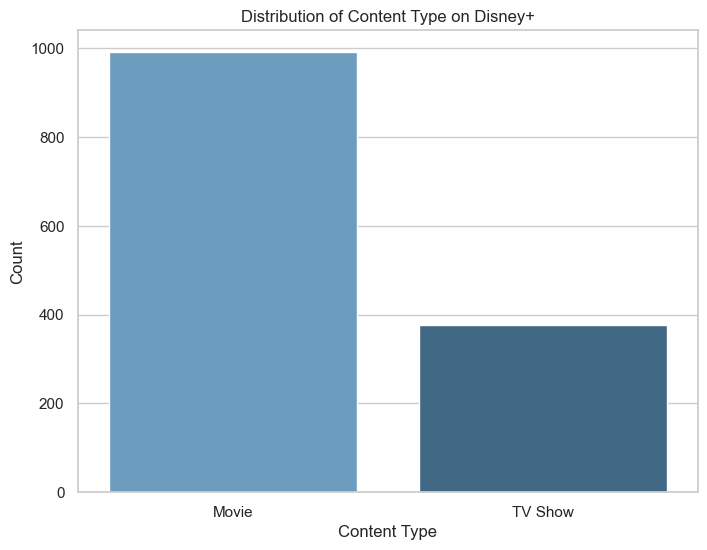

In [82]:
# Insight 1: Distribution of Content Type (Movies vs. TV Shows)
content_type_distribution = df['type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=content_type_distribution.index, y=content_type_distribution.values, palette="Blues_d")
plt.title('Distribution of Content Type on Disney+')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

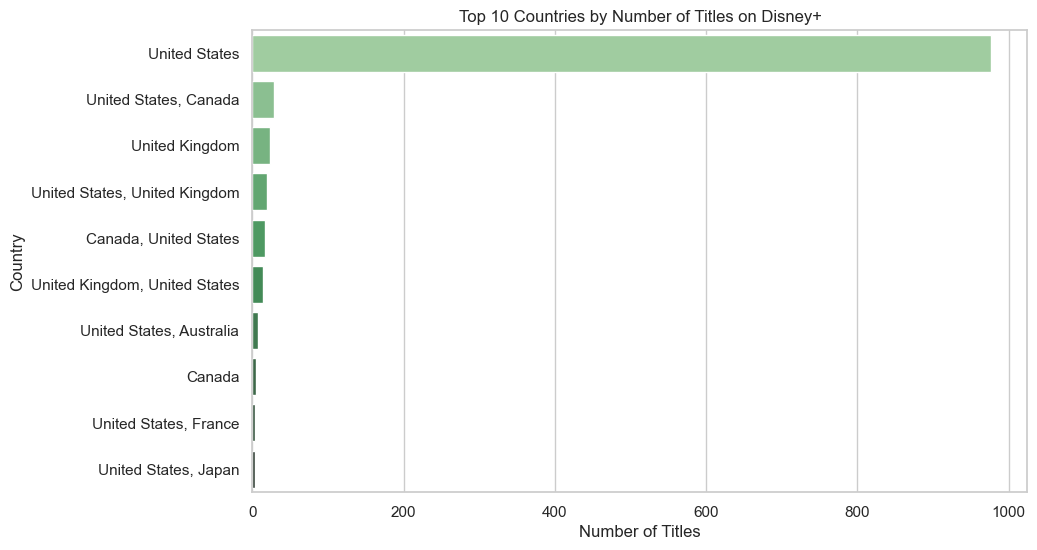

In [84]:
# Insight 2: Top 10 Countries by Content Count
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="Greens_d")
plt.title('Top 10 Countries by Number of Titles on Disney+')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

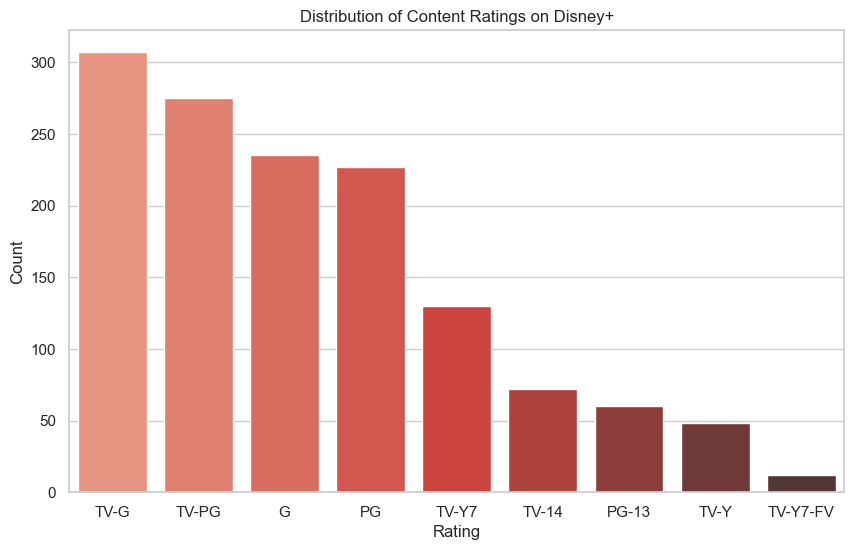

In [86]:
# Insight 3: Content Rating Distribution
rating_distribution = df['rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette="Reds_d")
plt.title('Distribution of Content Ratings on Disney+')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

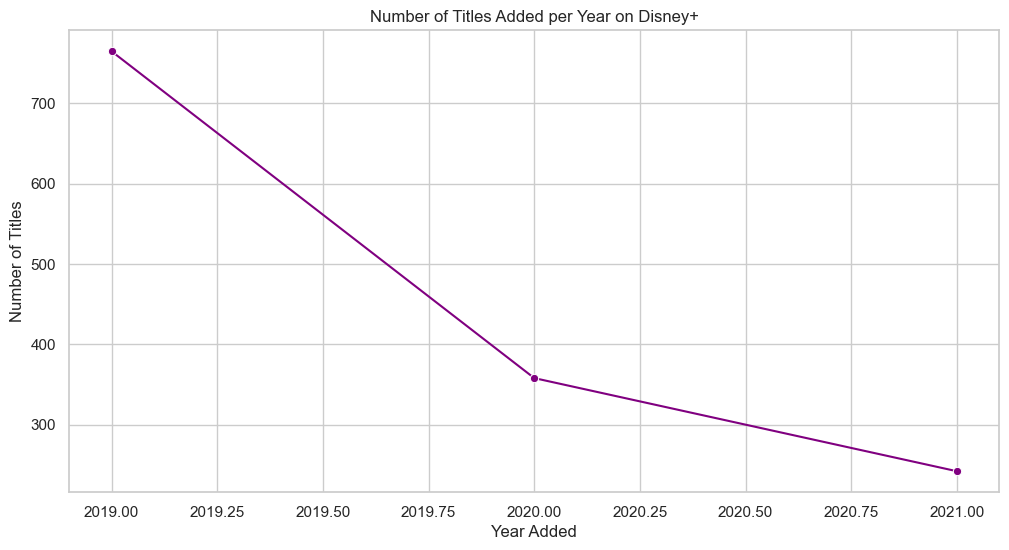

In [88]:
# Insight 4: Number of Titles Added per Year
df['year_added'] = df['date_added'].dt.year
titles_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker="o", color="purple")
plt.title('Number of Titles Added per Year on Disney+')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

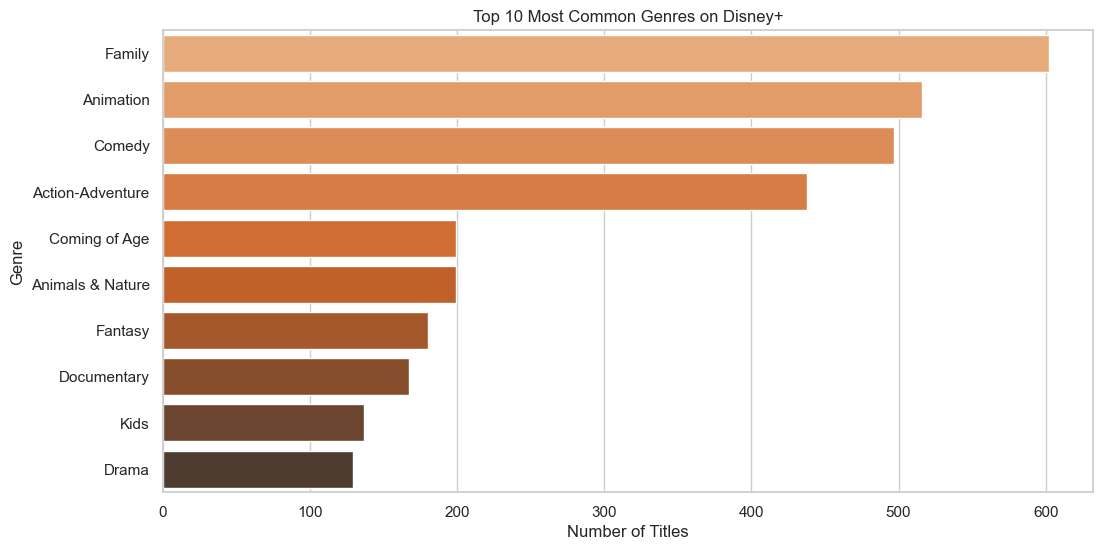

In [90]:
# Insight 5: Most Common Genres on Disney+
from collections import Counter

# Split the genres and count them
genres = df['listed_in'].str.split(', ').apply(Counter).sum()
common_genres = dict(genres.most_common(10))
plt.figure(figsize=(12, 6))
sns.barplot(y=list(common_genres.keys()), x=list(common_genres.values()), palette="Oranges_d")
plt.title('Top 10 Most Common Genres on Disney+')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

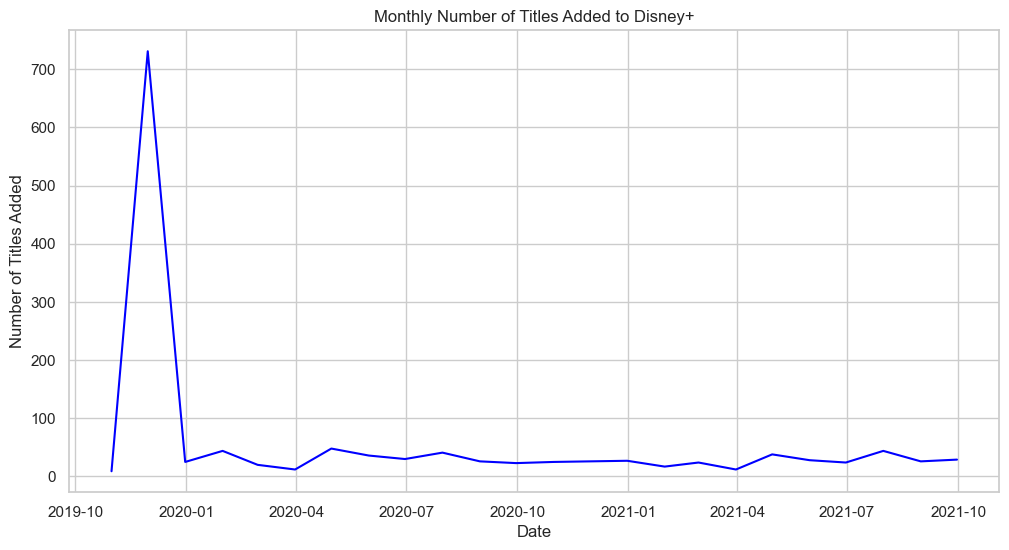

In [92]:
# 1. Time Series Analysis for Forecasting Trends and Seasonality
#Prepare the data for time series analysis.

from statsmodels.tsa.arima_model import ARIMA

# Set the index to 'date_added' for time series analysis
df.set_index('date_added', inplace=True)

# Resample the data by month and count the number of titles added each month
monthly_titles = df['type'].resample('M').count()

# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_titles, color='blue')
plt.title('Monthly Number of Titles Added to Disney+')
plt.xlabel('Date')
plt.ylabel('Number of Titles Added')
plt.show()

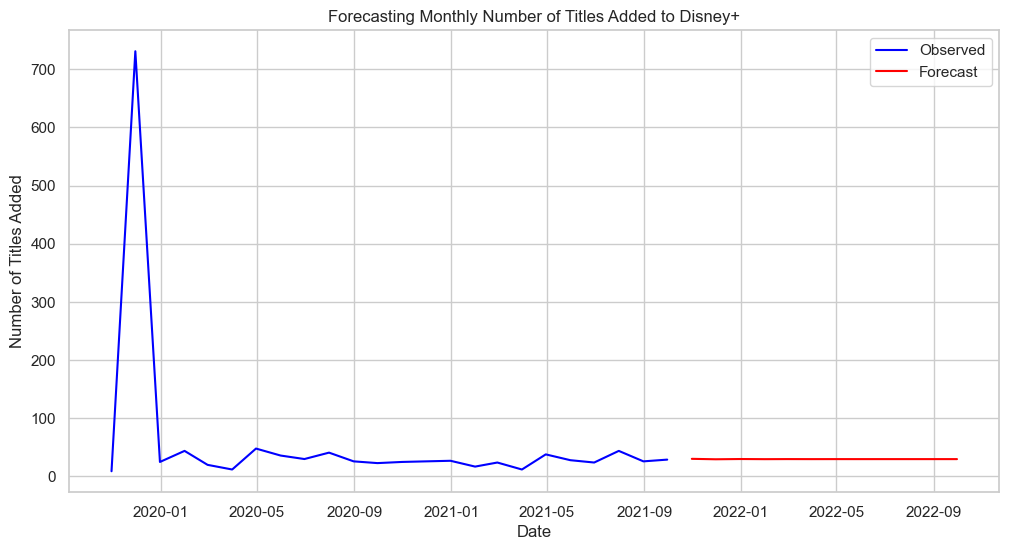

In [110]:
#Forecasting with ARIMA.

from statsmodels.tsa.arima.model import ARIMA

# Ensure the index is a DatetimeIndex with a monthly frequency
monthly_titles.index = pd.to_datetime(monthly_titles.index)
monthly_titles = monthly_titles.asfreq('M')

# Fit the ARIMA model
model = ARIMA(monthly_titles, order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)
forecast_dates = pd.date_range(start=monthly_titles.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Plot the forecast
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_titles, label='Observed', color='blue')
sns.lineplot(x=forecast_dates, y=forecast, label='Forecast', color='red')
plt.title('Forecasting Monthly Number of Titles Added to Disney+')
plt.xlabel('Date')
plt.ylabel('Number of Titles Added')
plt.legend()
plt.show()


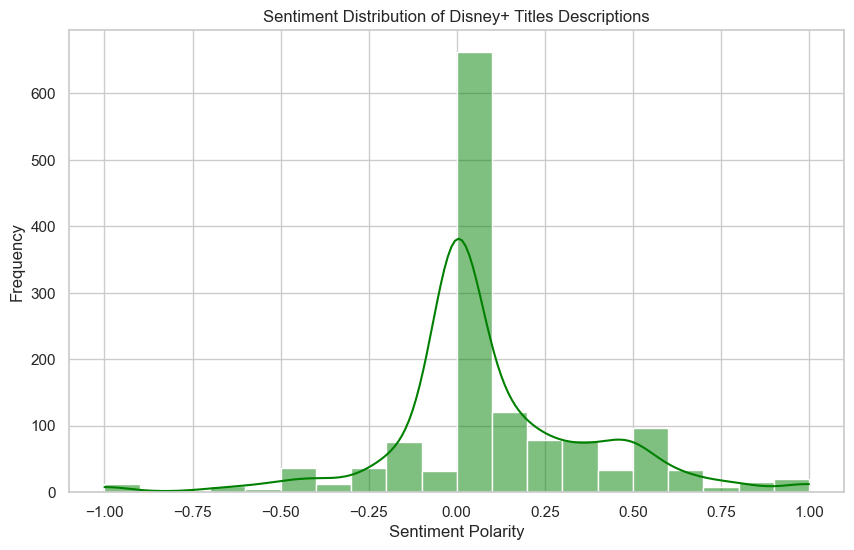

In [122]:
# 2.Sentiment Analysis or Text Mining on Unstructured Data
# Perform Sentiment Analysis.


# Perform sentiment analysis on the 'description' column
df['sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the distribution of sentiment
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='green')
plt.title('Sentiment Distribution of Disney+ Titles Descriptions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

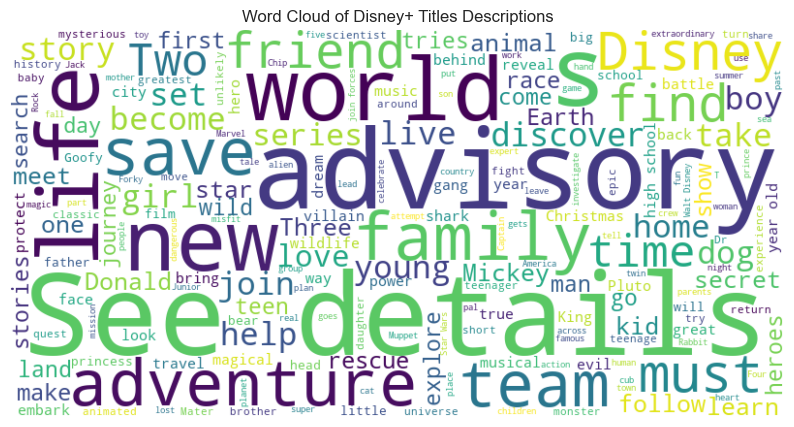

In [114]:
#Text Mining (Word Frequency Analysis).
from collections import Counter
from wordcloud import WordCloud

# Combine all descriptions into a single text
all_descriptions = ' '.join(df['description'].dropna().tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disney+ Titles Descriptions')
plt.show()


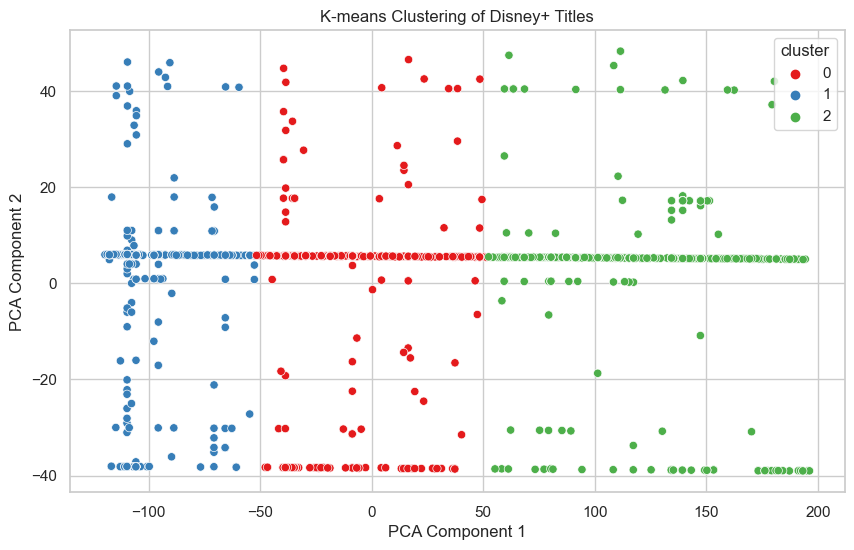

In [120]:
#3. Clustering or Classification for Segmentation and Pattern Recognition
# Data Preparation for Clustering.

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming df is your DataFrame
# Label encode categorical variables
df_encoded = df.copy()
df_encoded['rating'] = LabelEncoder().fit_transform(df_encoded['rating'].astype(str))
df_encoded['country'] = LabelEncoder().fit_transform(df_encoded['country'].astype(str))
df_encoded['listed_in'] = LabelEncoder().fit_transform(df_encoded['listed_in'].astype(str))

# Select features for clustering and drop missing values
features = df_encoded[['rating', 'country', 'listed_in']].dropna()

# Apply K-means clustering with explicit n_init value
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Add PCA features to DataFrame for plotting
df_encoded['PCA1'] = pca_features[:, 0]
df_encoded['PCA2'] = pca_features[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='Set1', data=df_encoded, legend='full')
plt.title('K-means Clustering of Disney+ Titles')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

